In [633]:
#define samples
changi = mthly_rainfall_df.loc[(mthly_rainfall_df['station']=='Changi') &  ((mthly_rainfall_df['date_ym']>="2014-03-01") |  (mthly_rainfall_df['date_ym']<="2013-10-01"))]
ubin = mthly_rainfall_df.loc[(mthly_rainfall_df['station']=='Pulau Ubin')]

ttest_ind(changi['total_rainfall'], ubin['total_rainfall'])


Ttest_indResult(statistic=-0.4498042550286355, pvalue=0.6532382539597399)

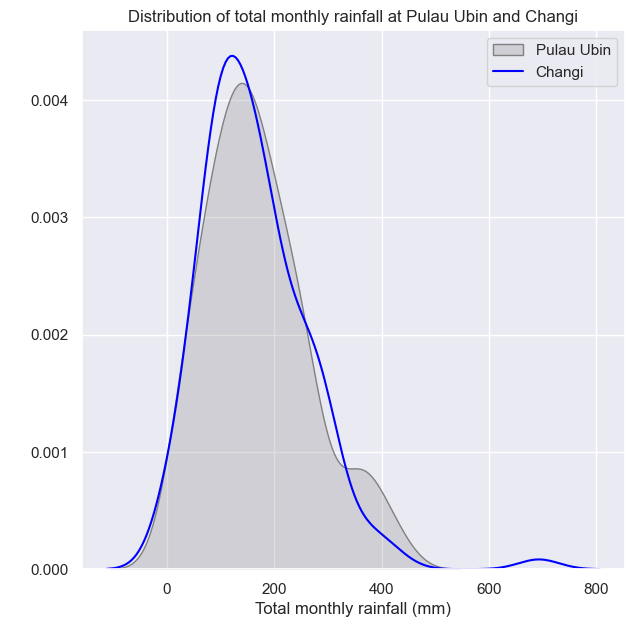

In [645]:
fig, ax = plt.subplots()
sns.kdeplot(data=ubin['total_rainfall'], ax=ax, color='grey', fill=True, label="Pulau Ubin")
sns.kdeplot(data=changi['total_rainfall'], ax=ax, color='blue', label="Changi")
plt.title("Distribution of total monthly rainfall at Pulau Ubin and Changi")
plt.xlabel("Total monthly rainfall (mm)")
plt.ylabel(" ")
plt.legend(loc="upper right")
plt.show()

In [635]:
ubin.columns

Index(['station', 'date_ym', 'total_rainfall', 'no_of_rainy_days', 'year',
       'outlier_rainfall'],
      dtype='object')

In [1]:
fig, ax = plt.subplots()
sns.kdeplot(data=ubin['no_of_rainy_days'], ax=ax, color='grey', fill=True, label="Pulau Ubin")
sns.kdeplot(data=changi['no_of_rainy_days'], ax=ax, color='blue', label="Changi")
plt.title("Distribution of number of rainy days at Pulau Ubin and Changi")
plt.xlabel("No. of rainy days")
plt.ylabel(" ")
plt.legend(loc="upper right")
plt.show()

NameError: name 'plt' is not defined

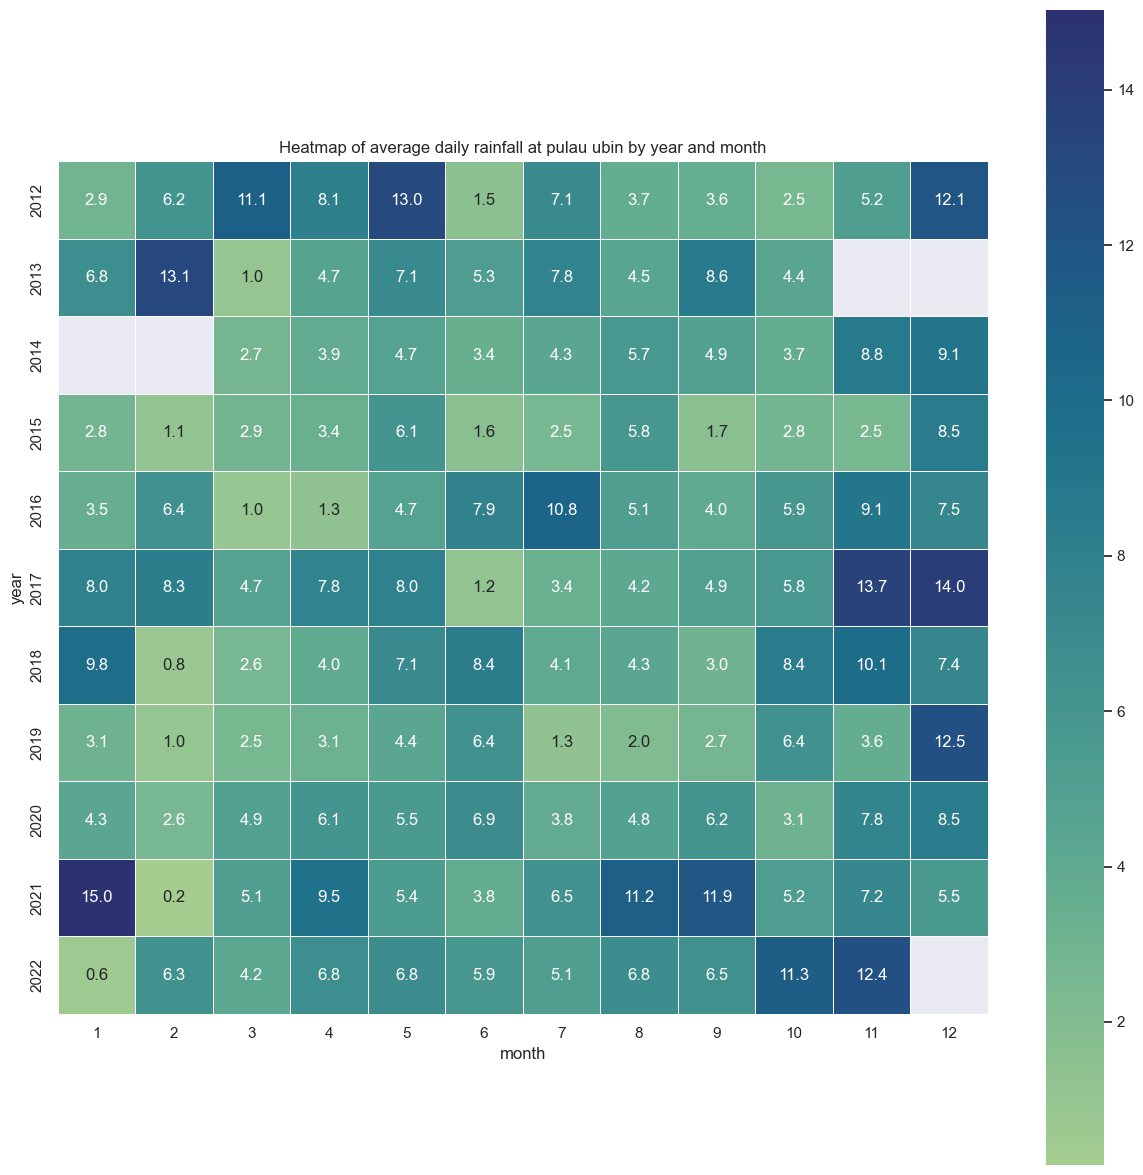

In [547]:
table_ubin_rainfall = pd.pivot_table(weather_df[weather_df['station']=="Pulau Ubin"], values='total_daily_rainfall', index=['year'],
                    columns=['month'], aggfunc=np.mean)
plt.title('Heatmap of average daily rainfall at pulau ubin by year and month')
sns.heatmap(table_ubin_rainfall, annot=True, fmt=".1f",square=True, linewidth=.5,cmap="crest")
plt.show()

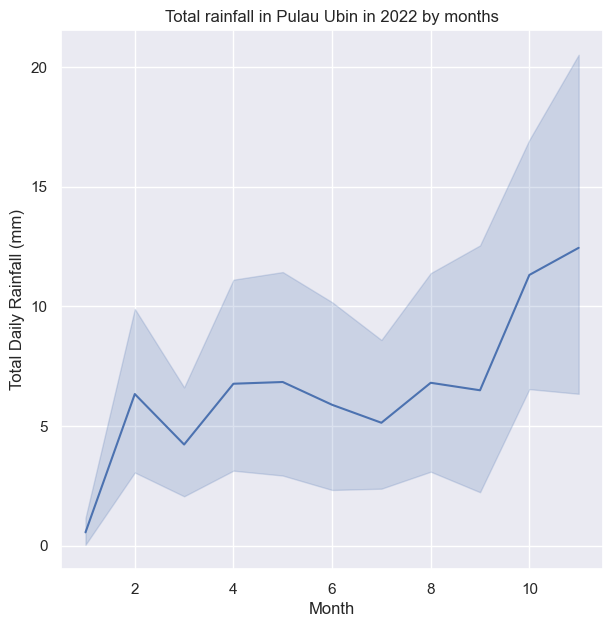

<Figure size 700x700 with 0 Axes>

In [650]:
plt.title('Total rainfall in Pulau Ubin in 2022 by months')
sns.set(rc={'figure.figsize': (7, 7)})
sns.lineplot(data=weather_df.loc[(weather_df['station']=="Pulau Ubin") & (weather_df['date_ym'].dt.year==2022)], 
             x='month', y='total_daily_rainfall') 
plt.xlabel('Month')
plt.ylabel('Total Daily Rainfall (mm)')
plt.show()
plt.savefig('../picture/ubin_rainfall_2022.jpeg')

/var/folders/f6/gmkl1q215gqd9pl16s0gr_v80000gn/T/ipykernel_6573/3703089682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubin2['year']=ubin2['date_ym'].dt.year
/var/folders/f6/gmkl1q215gqd9pl16s0gr_v80000gn/T/ipykernel_6573/3703089682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubin2['month']=ubin2['date_ym'].dt.month


<AxesSubplot: title={'center': 'Number of rainy days in a month from 2012-2022 at Pulau Ubin'}, xlabel='Month', ylabel='Number of rainy days - at least 0.2mm of rain'>

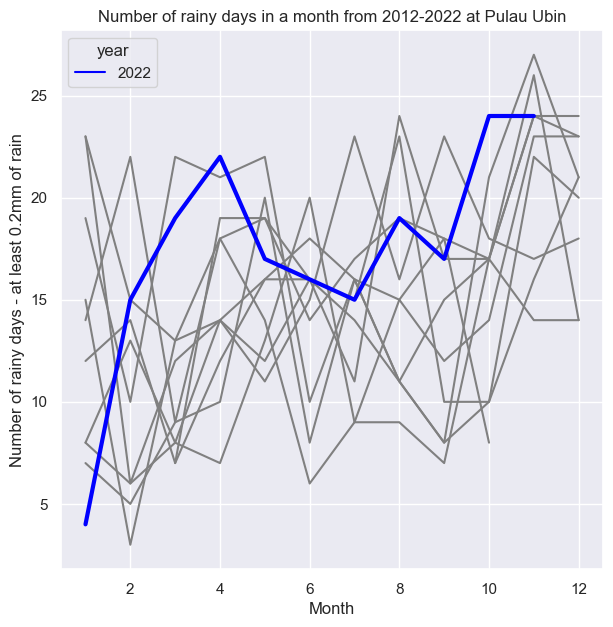

In [586]:
ubin2=mthly_rainfall_others.loc[mthly_rainfall_others['station']=="Pulau Ubin"]

ubin2['year']=ubin2['date_ym'].dt.year
ubin2['month']=ubin2['date_ym'].dt.month
# Make a 2022-only dataset
this_yr = ubin2.loc[ubin2['year'] == 2022]

plt.title("Number of rainy days in a month from 2012-2022 at Pulau Ubin")
plt.xlabel("Month")
plt.ylabel("Number of rainy days - at least 0.2mm of rain")
# Plot everything as grey, first
sns.lineplot(data = ubin2, x  = 'month', y='no_of_rainy_days',
             hue = "year", palette = ["grey"] * 11,
             legend = False)
# Then, plot 2022 on top
sns.lineplot(data = this_yr, x = "month", y = 'no_of_rainy_days',
             hue = "year", palette = ["blue"], linewidth = 3)

<AxesSubplot: title={'center': 'Total monthly rainfall from 2012-2022 at Pulau Ubin'}, xlabel='Month', ylabel='Total monthly rainfall (mm)'>

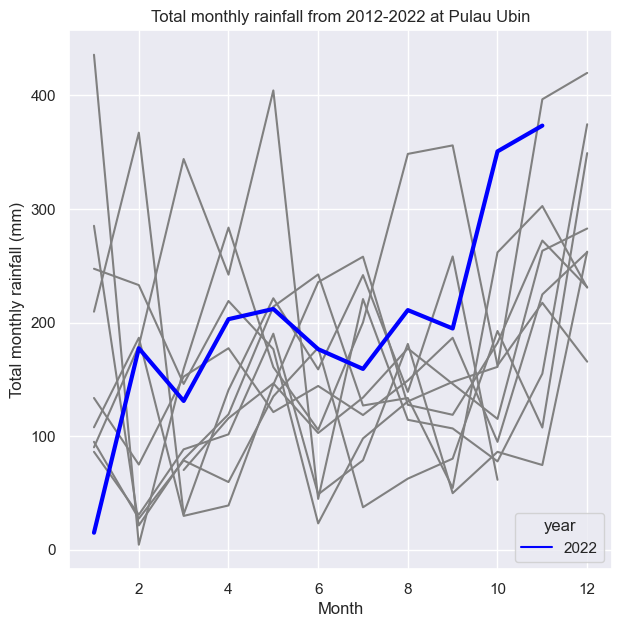

In [587]:
plt.title("Total monthly rainfall from 2012-2022 at Pulau Ubin")
plt.xlabel("Month")
plt.ylabel("Total monthly rainfall (mm)")
# Plot everything as grey, first
sns.lineplot(data = ubin2, x  = 'month', y='total_rainfall',
             hue = "year", palette = ["grey"] * 11,
             legend = False)
# Then, plot 2022 on top
sns.lineplot(data = this_yr, x = "month", y = 'total_rainfall',
             hue = "year", palette = ["blue"], linewidth = 3)

/var/folders/f6/gmkl1q215gqd9pl16s0gr_v80000gn/T/ipykernel_6573/2779943523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubin2.sort_values("year", inplace = True)


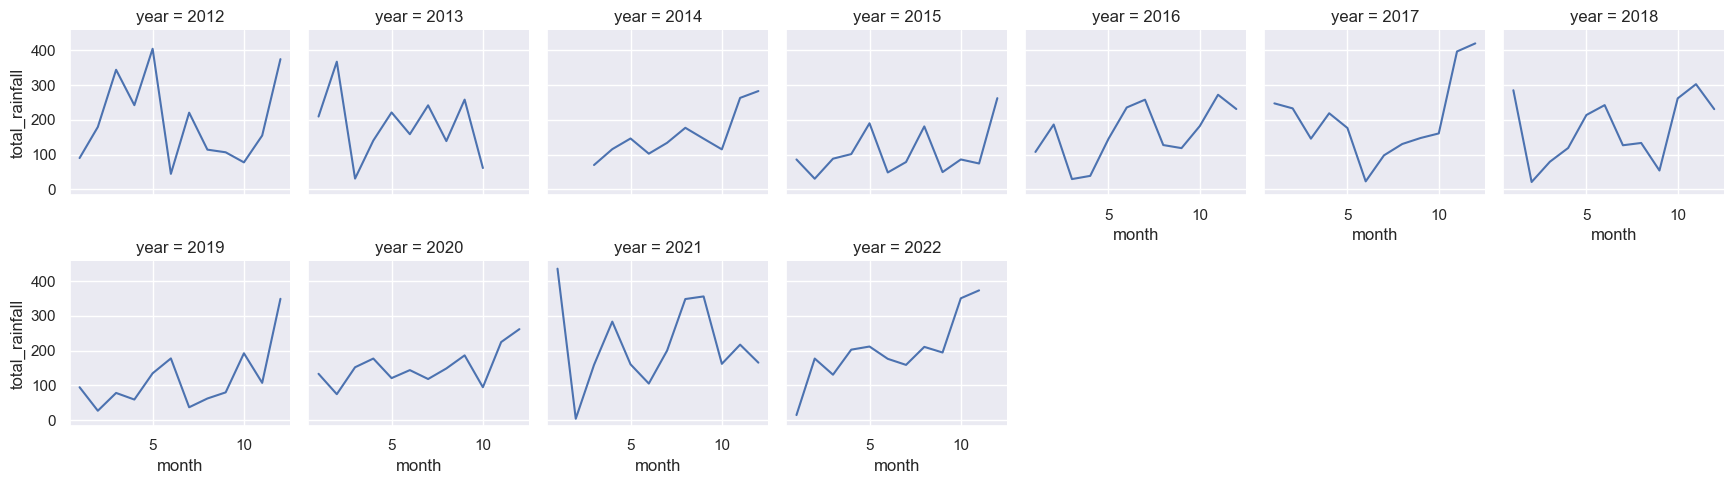

In [588]:
ubin2.sort_values("year", inplace = True)

sns.relplot(data = ubin2, x = "month", y = "total_rainfall", 
            col = "year", col_wrap = 7,
            kind = "line", height = 2.5)

In [590]:
ubin

,station,date_ym,total_rainfall,no_of_rainy_days,year,outlier_rainfall
390,Pulau Ubin,2012-01-01,90.2,19,2012,0
401,Pulau Ubin,2012-12-01,374.6,23,2012,0
400,Pulau Ubin,2012-11-01,155.0,23,2012,0
399,Pulau Ubin,2012-10-01,77.8,14,2012,0
397,Pulau Ubin,2012-08-01,114.4,15,2012,0
...,...,...,...,...,...,...
507,Pulau Ubin,2022-02-01,177.4,15,2022,0
506,Pulau Ubin,2022-01-01,15.0,4,2022,0
515,Pulau Ubin,2022-10-01,350.7,24,2022,0
510,Pulau Ubin,2022-05-01,212.0,17,2022,0


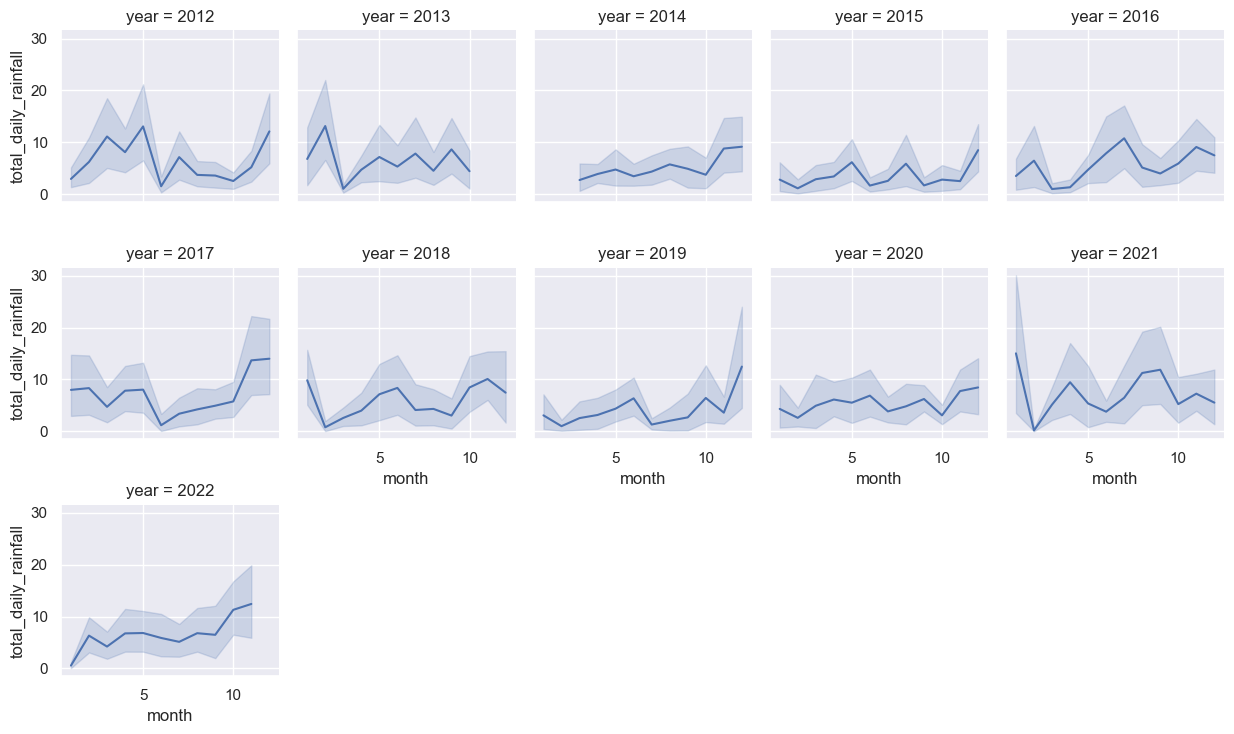

In [599]:
ubin = weather_df.loc[(weather_df['station']=='Pulau Ubin')]

sns.relplot(data = ubin, x = "month", y = "total_daily_rainfall", 
            col = "year", col_wrap = 5,
            kind = "line", height = 2.5)

In [631]:
new_data=weather_df[weather_df['station']=="Pulau Ubin"].groupby(['month','year']).agg(total_rainfall=('total_daily_rainfall','sum'),
                                                                    highest_2hr_rainfall=('highest_120min_rainfall','max'),
                                                                    no_of_rainy_days=('rainy_day','sum')).reset_index()
new_data.describe()

,month,year,total_rainfall,highest_2hr_rainfall,no_of_rainy_days
count,127.000000,127.000000,127.000000,105.000000,127.000000
mean,6.456693,2017.070866,169.039370,39.252381,15.173228
std,3.382391,3.142593,96.753897,18.740942,5.454130
min,1.000000,2012.000000,4.400000,4.000000,3.000000
25%,4.000000,2014.500000,99.800000,22.800000,11.000000
50%,6.000000,2017.000000,155.000000,37.600000,15.000000
75%,9.000000,2020.000000,223.100000,50.000000,19.000000
max,12.000000,2022.000000,435.800000,87.600000,27.000000


Text(0, 0.5, 'Total monthly rainfall (mm)')

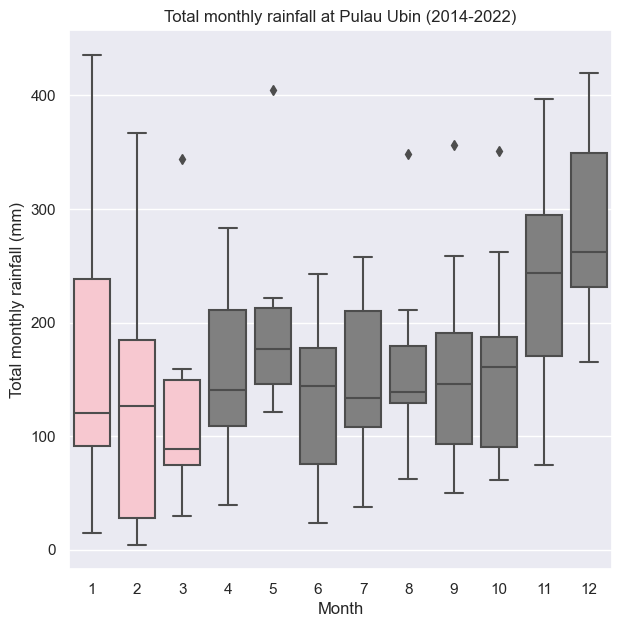

In [629]:
my_colors = {x: 'pink' if x in range(4) else 'grey' for x in new_data.month.unique()}
sns.boxplot(data=new_data, y='total_rainfall', x='month', palette = my_colors)

plt.title("Total monthly rainfall at Pulau Ubin (2014-2022)")
plt.xlabel("Month")
plt.ylabel("Total monthly rainfall (mm)")

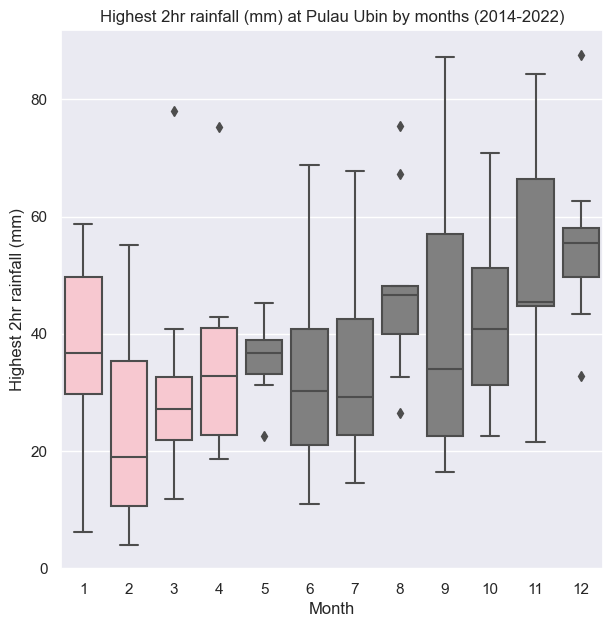

In [630]:
my_colors = {x: 'pink' if x in range(5) else 'grey' for x in new_data.month.unique()}
sns.boxplot(data=new_data, y='highest_2hr_rainfall', x='month', palette = my_colors)

plt.title("Highest 2hr rainfall (mm) at Pulau Ubin by months (2014-2022)")
plt.xlabel("Month")
plt.ylabel("Highest 2hr rainfall (mm)")
plt.show()

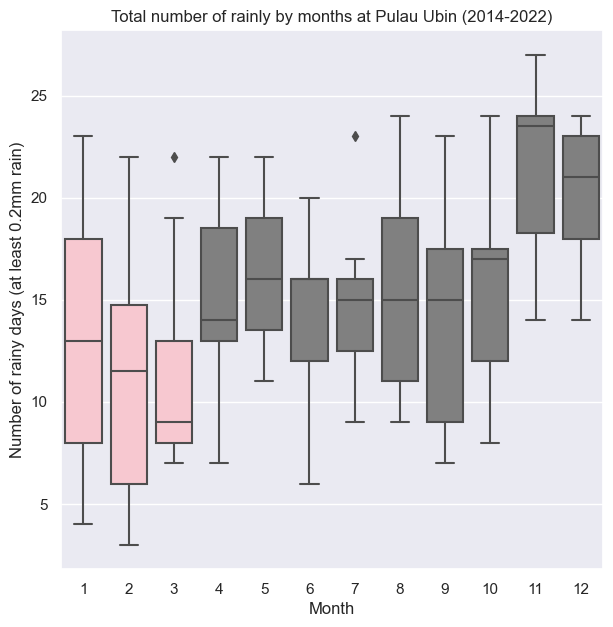

In [625]:
my_colors = {x: 'pink' if x in range(4) else 'grey' for x in new_data.month.unique()}
sns.boxplot(data=new_data, y='no_of_rainy_days', x='month', palette = my_colors)
plt.title("Total number of rainly by months at Pulau Ubin (2014-2022)")
plt.xlabel("Month")
plt.ylabel("Number of rainy days (at least 0.2mm rain)")
plt.show()


In [601]:
weather_df.columns

Index(['station', 'year', 'month', 'day', 'date', 'date_ym',
       'total_daily_rainfall', 'highest_30min_rainfall',
       'highest_60min_rainfall', 'highest_120min_rainfall', 'mean_temp',
       'max_temp', 'min_temp', 'mean_wind_sp', 'max_wind_sp', 'rainy_day'],
      dtype='object')

In [ ]:
plt.title('Heatmap of mean temperature by station')
sns.set(rc={'figure.figsize': (7, 7)})

plt.show()

In [632]:
data2=weather_df[weather_df['station']=="Pulau Ubin"]

col_list=['total_daily_rainfall','highest_120min_rainfall',
          'mean_temp',
          'mean_wind_sp','max_wind_sp']
for col in col_list:
    print(col)
    print(data2[col].describe())
    print(data2.groupby('month')[col].describe())
    print(data2.groupby('station')[col].describe())
    print(" ")

total_daily_rainfall
count    3739.000000
mean        5.741642
std        12.876961
min         0.000000
25%         0.000000
50%         0.200000
75%         4.800000
max       186.000000
Name: total_daily_rainfall, dtype: float64
       count      mean        std  min  25%  50%    75%    max
month                                                         
1      302.0  5.648344  16.889248  0.0  0.0  0.0   2.95  186.0
2      283.0  4.603534  11.856440  0.0  0.0  0.0   1.40   97.6
3      336.0  3.900000  10.321287  0.0  0.0  0.0   2.20   87.8
4      316.0  5.382911  10.510166  0.0  0.0  0.2   6.00   75.2
5      321.0  6.627726  13.474653  0.0  0.0  0.2   6.00   89.2
6      306.0  4.773203  10.725047  0.0  0.0  0.2   4.35   76.4
7      330.0  5.071818  11.446167  0.0  0.0  0.0   4.10   95.2
8      335.0  5.297612  11.868927  0.0  0.0  0.2   4.30   94.6
9      318.0  5.344025  11.815394  0.0  0.0  0.0   5.20   97.6
10     320.0  5.457187  11.458187  0.0  0.0  0.4   4.80   71.4
11     298.0